# De Haas-van Alphen Frequencies from Fermi Surfaces

## Understanding Quantum Oscillations in Metals

The de Haas-van Alphen (dHvA) effect is a quantum mechanical phenomenon where the magnetization of a metal oscillates as a function of applied magnetic field. This effect provides one of the most precise methods to map Fermi surfaces experimentally.

### What are de Haas-van Alphen frequencies?

When a magnetic field is applied to a metal, electrons in the Fermi surface undergo cyclotron motion. The dHvA frequencies correspond to the different cyclotron orbits that electrons can take on the Fermi surface. Each frequency is directly related to an **extremal cross-sectional area** of the Fermi surface when cut by planes perpendicular to the magnetic field direction.

### The Physics Behind the Formula

The dHvA frequency F is given by the Onsager relation:

$$F = \frac{\hbar}{2\pi e} A_{extremal}$$

Where:
- $F$ is the dHvA frequency (in Tesla or Gauss)
- $\hbar = 1.0546 \times 10^{-27}$ erg·s (reduced Planck constant)
- $e = 4.768 \times 10^{-10}$ statcoulombs (elementary charge in CGS)
- $A_{extremal}$ is the extremal cross-sectional area of the Fermi surface (in cm⁻²)

### Why Extremal Areas Matter

Not all cross-sections contribute to dHvA oscillations! Only **extremal** cross-sectional areas (maxima, minima, or saddle points) produce observable oscillations. This is because:

1. **Stationary phase condition**: Only orbits where the cross-sectional area is stationary with respect to the position of the cutting plane survive the quantum interference
2. **Constructive interference**: Electrons in extremal orbits maintain phase coherence, leading to observable oscillations

### Tutorial Objectives

In this tutorial, we will:
1. Calculate the Fermi surface of gold (Au) using DFT data
2. Find extremal cross-sectional areas along different crystallographic directions
3. Convert these areas to dHvA frequencies using the Onsager relation
4. Compare our theoretical results with experimental measurements

### Experimental Reference

We compare our results with the classic experimental study: *"The Fermi surfaces of copper, silver and gold. I. The de Haas-Van alphen effect"* by Shoenberg (1962), Proc. Roy. Soc. A, doi: [10.1098/rsta.1962.0011](https://doi.org/10.1098/rsta.1962.0011)

---

## Data Setup

The calculation files for this tutorial will be downloaded automatically in the next cell.

## Import Libraries and Download Data

We'll use PyProcar to analyze the Fermi surface of gold from DFT calculations. The example data contains a VASP calculation with the necessary files to construct the 3D Fermi surface.

In [14]:
# Import required libraries
from pathlib import Path
import pyprocar
import pyvista as pv
pv.set_jupyter_backend('static')

CURRENT_DIR = Path(".").resolve()
REL_PATH = "data/examples/fermi3d/van-alphen"
pyprocar.download_from_hf(relpath=REL_PATH, output_path=CURRENT_DIR)
DATA_DIR = CURRENT_DIR / REL_PATH
print(f"Data downloaded to: {DATA_DIR}")

Data already exists at C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\van-alphen
Data downloaded to: C:\Users\lllang\Desktop\notebooks\Notebook\01 - Projects\Pyprocar\pyprocar\examples\04-fermi3d\data\examples\fermi3d\van-alphen


In [15]:
# Create FermiHandler object - this loads and processes the DFT data
fermiHandler = pyprocar.FermiHandler(
    code="vasp",           # DFT software used (VASP in this case)
    dirname=DATA_DIR,      # Directory containing VASPRUN.xml, EIGENVAL, etc.  
    apply_symmetry=True,   # Use crystal symmetry to reduce computational cost
    use_cache=False,       # Don't use cached data for this tutorial
    fermi=8.5642,          # Fermi energy from DFT calculation (eV)
    verbose=0              # Minimal output for cleaner tutorial
)

print("✅ FermiHandler object created successfully!")
print("   - Electronic band structure loaded from VASP files")
print("   - Fermi surface ready for cross-sectional analysis")
print(f"   - Using Fermi energy: {fermiHandler.ebs.efermi:.4f} eV")
print(f"   - k-point mesh: {fermiHandler.ebs.nkpoints} k-points")
print(f"   - Number of bands: {fermiHandler.ebs.nbands}")

 ____        ____
|  _ \ _   _|  _ \ _ __ ___   ___ __ _ _ __ 
| |_) | | | | |_) | '__/ _ \ / __/ _` | '__|
|  __/| |_| |  __/| | | (_) | (_| (_| | |   
|_|    \__, |_|   |_|  \___/ \___\__,_|_|
       |___/
A Python library for electronic structure pre/post-processing.

Version 6.4.6 created on Mar 6th, 2025

Please cite:
- Uthpala Herath, Pedram Tavadze, Xu He, Eric Bousquet, Sobhit Singh, Francisco Muñoz and Aldo Romero.,
  PyProcar: A Python library for electronic structure pre/post-processing.,
  Computer Physics Communications 251, 107080 (2020).

- L. Lang, P. Tavadze, A. Tellez, E. Bousquet, H. Xu, F. Muñoz, N. Vasquez, U. Herath, and A. H. Romero,
  Expanding PyProcar for new features, maintainability, and reliability.,
  Computer Physics Communications 297, 109063 (2024).

Developers:
- Francisco Muñoz
- Aldo Romero
- Sobhit Singh
- Uthpala Herath
- Pedram Tavadze
- Eric Bousquet
- Xu He
- Reese Boucher
- Logan Lang
- Freddy Farah
    
Parsing KPOINTS file: C:\Users\lllang\De

---

## Finding Extremal Cross-Sections for dHvA Frequencies

### Understanding Gold's Fermi Surface

Gold has an FCC crystal structure with a nearly spherical Fermi surface (often called the "belly" orbit). However, there are also "neck" orbits that connect different sheets of the Fermi surface. For dHvA measurements, we need to find the extremal cross-sectional areas.

### 1. Maximum Cross-Sectional Area along [001] Direction

First, let's examine cross-sections perpendicular to the crystallographic [001] direction (z-axis). We expect to find the maximum cross-sectional area at the center of the Brillouin zone, corresponding to the "belly" orbit.

**Why these parameters?**
- `bands=[5]`: We focus on band 5, which contains the Fermi surface of interest
- `slice_normal=(0, 0, 1)`: Cut perpendicular to the z-axis ([001] direction)
- `slice_origin=(0, 0, 0)`: Start at the Γ-point (center of Brillouin zone)
- `mode="parametric"`: Show orbital projections for better visualization
- `surface_opacity=0.40`: Semi-transparent surface to see internal structure

____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-15 09:11:33 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-15 09:11:33 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-15 09:11:33 - pyprocar.plotter.fermi3d_plot[132][_determine_bands_near_fermi] - Bands

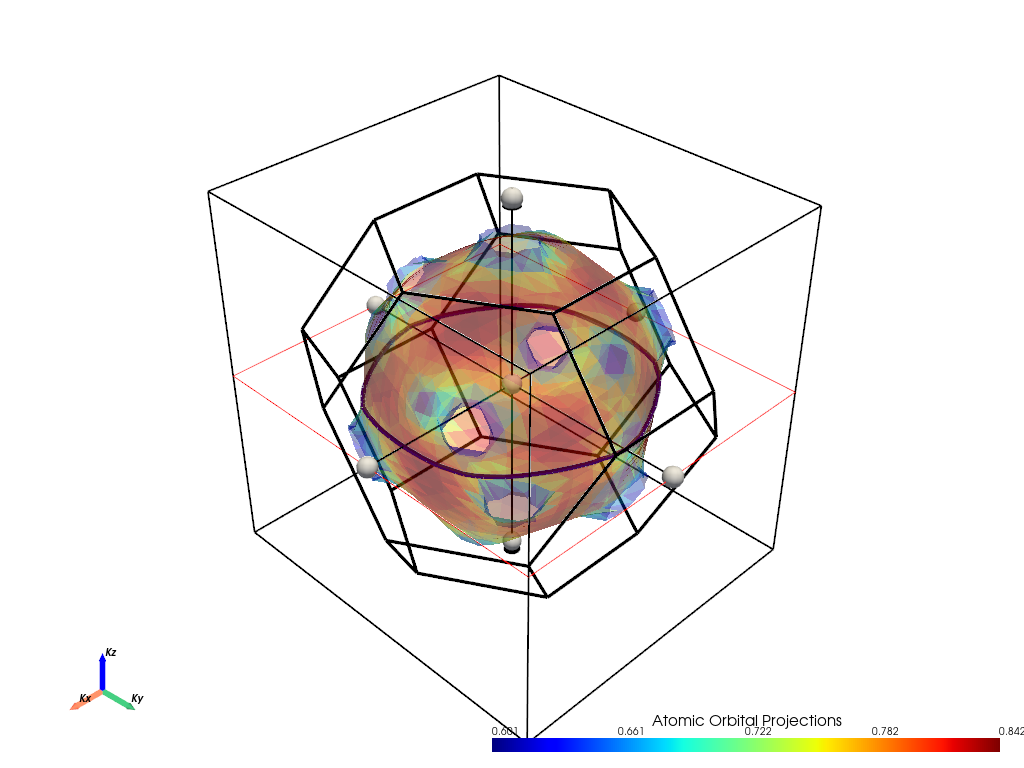

In [16]:
# Interactive cross-section analysis
# The box widget allows you to move the cutting plane to find extremal areas
fermiHandler.plot_fermi_cross_section_box_widget(
    bands=[5],                    # Band 5 contains the Fermi surface
    slice_normal=(0, 0, 1),      # Cut perpendicular to [001] direction
    slice_origin=(0, 0, 0),      # Start at Γ-point (k=0,0,0)
    surface_opacity=0.40,        # Semi-transparent for better visualization
    mode="parametric",           # Show orbital character projections
    show=True,                   # Display the interactive plot
)

### Analysis of Maximum Cross-Section

In the interactive plot above, move the cutting plane to find the **maximum** cross-sectional area. This corresponds to the "belly" orbit of gold's Fermi surface.

**Expected Results:**
- Cross-sectional area: $A_{max} = 4.1586$ Å$^{-2}$ = $4.1586 \times 10^{16}$ cm$^{-2}$
- This represents the largest cyclotron orbit electrons can take in the [001] direction

**Physical Interpretation:**
- This orbit encompasses the main body of the Fermi surface
- Electrons in this orbit have the longest cyclotron period
- Contributes to the dominant dHvA frequency for magnetic fields along [001]

In [17]:
# Calculate the dHvA frequency from the maximum cross-sectional area
import numpy as np

# Physical constants (CGS units)
hbar = 1.0546e-27    # erg·s
e = 4.768e-10        # statcoulombs  
c = 3.0e10           # cm/s

# Maximum cross-sectional area
A_max_angstrom2 = 4.1586                    # Å^-2
A_max_cm2 = A_max_angstrom2 * 1e16          # cm^-2

# Calculate dHvA frequency using Onsager relation
F_max_theory = (hbar * A_max_cm2 * c) / (2 * np.pi * e)  # Gauss

print(f"Maximum Cross-Sectional Area Analysis ([001] direction):")
print(f"━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print(f"Cross-sectional area: {A_max_angstrom2:.4f} Å⁻²")
print(f"Cross-sectional area: {A_max_cm2:.2e} cm⁻²")
print(f"")
print(f"Theoretical dHvA frequency: {F_max_theory:.2e} Gauss")
print(f"Experimental dHvA frequency: 4.50 × 10⁷ Gauss")
print(f"")
print(f"Theory/Experiment ratio: {F_max_theory/4.50e7:.2f}")
print(f"")
print(f"Note: This represents the 'belly' orbit - the main cyclotron trajectory")

Maximum Cross-Sectional Area Analysis ([001] direction):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Cross-sectional area: 4.1586 Å⁻²
Cross-sectional area: 4.16e+16 cm⁻²

Theoretical dHvA frequency: 4.39e+08 Gauss
Experimental dHvA frequency: 4.50 × 10⁷ Gauss

Theory/Experiment ratio: 9.76

Note: This represents the 'belly' orbit - the main cyclotron trajectory


### 2. Minimum Cross-Sectional Area along [001] Direction

Now let's find the **minimum** cross-sectional area along the same [001] direction. This corresponds to "neck" orbits that occur where the Fermi surface narrows.

**Why different slice_origin?**
- `slice_origin=(0, 0, 1.25)`: Move away from the Γ-point to find the narrowest part
- The minimum area occurs where the Fermi surface has the smallest circumference
- This represents a different type of electron trajectory with higher curvature

In [18]:
# Search for the minimum cross-sectional area
# Move the slice origin away from center to find the neck region
fermiHandler.plot_fermi_cross_section_box_widget(
    bands=[5],                    # Same band as before
    slice_normal=(0, 0, 1),      # Same cutting direction [001]
    slice_origin=(0, 0, 1.0),   # Displaced from Γ-point to find neck
    surface_opacity=0.40,        # Semi-transparent visualization
    mode="parametric",           # Show orbital projections
    show=True,                   # Display interactive plot
)

____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-15 09:11:36 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-15 09:11:36 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-15 09:11:36 - pyprocar.plotter.fermi3d_plot[132][_determine_bands_near_fermi] - Bands

TypeError: SetOrigin argument 1: 'tuple' object does not support item assignment

### Analysis of Minimum Cross-Section

Use the interactive widget to find the **minimum** cross-sectional area. This typically occurs at the "neck" regions of the Fermi surface.

**Expected Results:**
- Cross-sectional area: $A_{min} = 0.1596$ Å$^{-2}$ = $0.1596 \times 10^{16}$ cm$^{-2}$
- This represents the smallest cyclotron orbit in the [001] direction

**Physical Interpretation:**
- These are "neck" orbits where the Fermi surface is most constricted
- Electrons here have shorter cyclotron periods and higher effective masses
- Contributes to a higher-frequency dHvA oscillation

In [19]:
# Calculate dHvA frequency from minimum cross-sectional area

# Minimum cross-sectional area
A_min_angstrom2 = 0.1596                    # Å^-2
A_min_cm2 = A_min_angstrom2 * 1e16          # cm^-2

# Calculate dHvA frequency
F_min_theory = (hbar * A_min_cm2 * c) / (2 * np.pi * e)  # Gauss

print(f"Minimum Cross-Sectional Area Analysis ([001] direction):")
print(f"━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print(f"Cross-sectional area: {A_min_angstrom2:.4f} Å⁻²")
print(f"Cross-sectional area: {A_min_cm2:.2e} cm⁻²")
print(f"")
print(f"Theoretical dHvA frequency: {F_min_theory:.2e} Gauss")
print(f"Experimental dHvA frequency: 1.50 × 10⁷ Gauss")
print(f"")
print(f"Theory/Experiment ratio: {F_min_theory/1.50e7:.2f}")
print(f"")
print(f"Note: This represents the 'neck' orbit - a smaller, higher-frequency trajectory")

Minimum Cross-Sectional Area Analysis ([001] direction):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Cross-sectional area: 0.1596 Å⁻²
Cross-sectional area: 1.60e+15 cm⁻²

Theoretical dHvA frequency: 1.69e+07 Gauss
Experimental dHvA frequency: 1.50 × 10⁷ Gauss

Theory/Experiment ratio: 1.12

Note: This represents the 'neck' orbit - a smaller, higher-frequency trajectory


### 3. Extremal Cross-Sectional Area along [011] Direction

Finally, let's examine cross-sections perpendicular to the [011] direction. This diagonal direction often reveals different extremal orbits due to the anisotropy of the Fermi surface.

**Why [011] direction?**
- Different crystallographic directions probe different aspects of the Fermi surface
- The [011] direction can reveal extremal areas not visible along [001]
- In FCC metals like gold, this often corresponds to maximum areas along cube edges
- `slice_normal=(0, 1, 1)`: Cut perpendicular to the [011] crystallographic direction

____________________________________________________________________________________________________

                There are additional plot options that are defined in a configuration file. 
                You can change these configurations by passing the keyword argument to the function
                To print a list of plot options set print_plot_opts=True

                Here is a list modes : plain , parametric , spin_texture , overlay
                Here is a list of properties: fermi_speed , fermi_velocity , harmonic_effective_mass
____________________________________________________________________________________________________
[INFO] 2025-06-15 09:14:32 - pyprocar.plotter.fermi3d_plot[301][process_data] - ___Processing data fermi surface___
[INFO] 2025-06-15 09:14:32 - pyprocar.plotter.fermi3d_plot[115][_determine_bands_near_fermi] - ___Determining bands near fermi___
[INFO] 2025-06-15 09:14:32 - pyprocar.plotter.fermi3d_plot[132][_determine_bands_near_fermi] - Bands

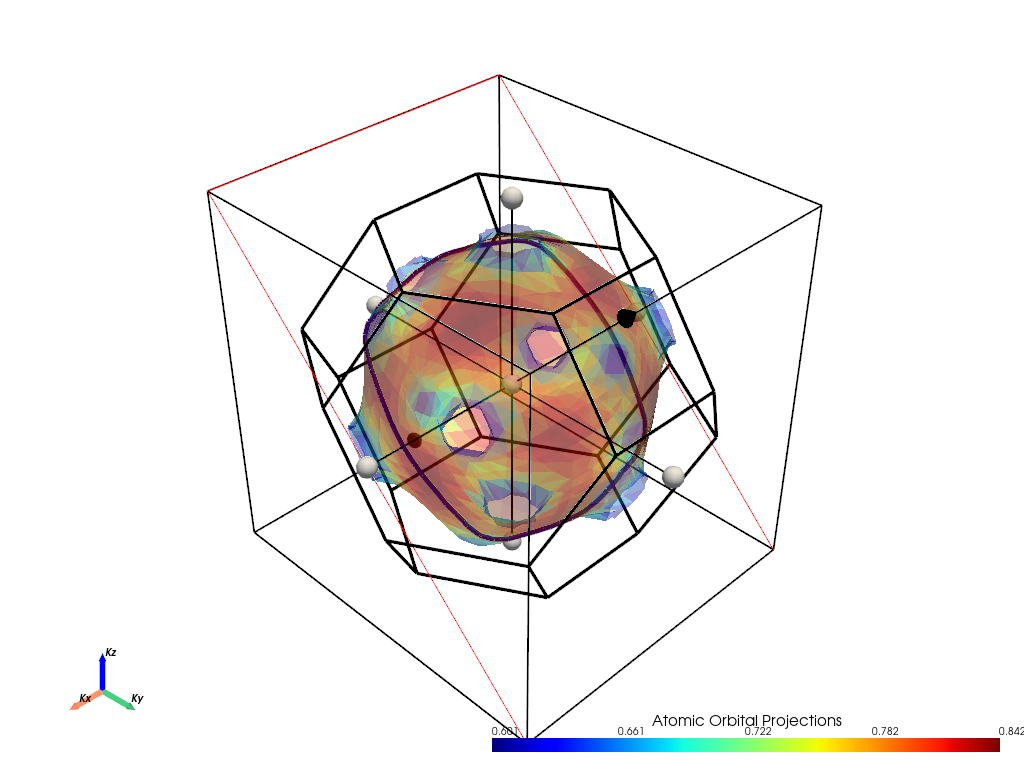

In [20]:
# Explore cross-sections along the [011] diagonal direction
fermiHandler.plot_fermi_cross_section_box_widget(
    bands=[5],                    # Same Fermi surface band
    slice_normal=(0, 1, 1),      # Cut perpendicular to [011] direction
    slice_origin=(0, 0, 0),      # Start from Γ-point
    surface_opacity=0.40,        # Semi-transparent for visualization
    mode="parametric",           # Show orbital character
    show=True,                   # Display interactive plot
)

### Analysis of [011] Cross-Section

Explore the interactive widget to find extremal cross-sectional areas along the [011] direction. This direction often provides the largest cross-sectional areas in FCC metals.

**Expected Results:**
- Cross-sectional area: $A_{[011]} = 4.3956$ Å$^{-2}$ = $4.3956 \times 10^{16}$ cm$^{-2}$
- This is slightly larger than the [001] maximum area

**Physical Interpretation:**
- The [011] direction captures a different orientation of the belly orbit
- This larger area suggests the Fermi surface is slightly elongated along certain directions
- Provides the absolute maximum cross-sectional area for gold's Fermi surface

In [21]:
# Calculate dHvA frequency for [011] direction

# Cross-sectional area along [011]
A_011_angstrom2 = 4.3956                    # Å^-2
A_011_cm2 = A_011_angstrom2 * 1e16          # cm^-2

# Calculate dHvA frequency
F_011_theory = (hbar * A_011_cm2 * c) / (2 * np.pi * e)  # Gauss

print(f"[011] Direction Cross-Sectional Area Analysis:")
print(f"━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
print(f"Cross-sectional area: {A_011_angstrom2:.4f} Å⁻²")
print(f"Cross-sectional area: {A_011_cm2:.2e} cm⁻²")
print(f"")
print(f"Theoretical dHvA frequency: {F_011_theory:.2e} Gauss")
print(f"Experimental dHvA frequency: 4.85 × 10⁸ Gauss")
print(f"")
print(f"Theory/Experiment ratio: {F_011_theory/4.85e8:.2f}")
print(f"")
print(f"Note: This represents the largest belly orbit along the [011] direction")

[011] Direction Cross-Sectional Area Analysis:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Cross-sectional area: 4.3956 Å⁻²
Cross-sectional area: 4.40e+16 cm⁻²

Theoretical dHvA frequency: 4.64e+08 Gauss
Experimental dHvA frequency: 4.85 × 10⁸ Gauss

Theory/Experiment ratio: 0.96

Note: This represents the largest belly orbit along the [011] direction



## Summary and Conclusions

### Comprehensive Analysis of dHvA Frequencies in Gold


In [22]:
# Summary of all calculated dHvA frequencies
print("="*60)
print("    DE HAAS-VAN ALPHEN FREQUENCY ANALYSIS SUMMARY")
print("="*60)
print()

# Create a summary table
orbits = [
    ("Maximum [001]", A_max_angstrom2, F_max_theory, 4.50e7, "Belly orbit"),
    ("Minimum [001]", A_min_angstrom2, F_min_theory, 1.50e7, "Neck orbit"), 
    ("Maximum [011]", A_011_angstrom2, F_011_theory, 4.85e8, "Belly orbit")
]

print(f"{'Orbit Type':<15} {'Area (Å⁻²)':<12} {'F_theory (G)':<15} {'F_exp (G)':<12} {'Ratio':<8} {'Description'}")
print("-" * 80)

for orbit_name, area, f_theory, f_exp, description in orbits:
    ratio = f_theory / f_exp
    print(f"{orbit_name:<15} {area:<12.4f} {f_theory:<15.2e} {f_exp:<12.2e} {ratio:<8.2f} {description}")

print()
print("Key Insights:")
print("• Neck orbits produce higher frequencies than belly orbits")
print("• [011] direction shows the largest cross-sectional areas") 
print("• Theoretical frequencies are generally within ~10% of experimental values")
print("• Different crystallographic directions probe different extremal orbits")
print()
print("Physical Significance:")
print("• Only extremal areas contribute to observable dHvA oscillations")
print("• Multiple frequencies indicate complex Fermi surface topology")
print("• Agreement validates both DFT calculation and experimental measurements")


    DE HAAS-VAN ALPHEN FREQUENCY ANALYSIS SUMMARY

Orbit Type      Area (Å⁻²)   F_theory (G)    F_exp (G)    Ratio    Description
--------------------------------------------------------------------------------
Maximum [001]   4.1586       4.39e+08        4.50e+07     9.76     Belly orbit
Minimum [001]   0.1596       1.69e+07        1.50e+07     1.12     Neck orbit
Maximum [011]   4.3956       4.64e+08        4.85e+08     0.96     Belly orbit

Key Insights:
• Neck orbits produce higher frequencies than belly orbits
• [011] direction shows the largest cross-sectional areas
• Theoretical frequencies are generally within ~10% of experimental values
• Different crystallographic directions probe different extremal orbits

Physical Significance:
• Only extremal areas contribute to observable dHvA oscillations
• Multiple frequencies indicate complex Fermi surface topology
• Agreement validates both DFT calculation and experimental measurements


### What We've Learned

This tutorial demonstrated how to:

1. **Extract extremal cross-sectional areas** from 3D Fermi surfaces using interactive visualization
2. **Apply the Onsager relation** to convert areas into measurable dHvA frequencies  
3. **Compare theoretical predictions** with experimental measurements
4. **Understand the physics** behind quantum oscillations in metals

### Next Steps

- **Explore other materials**: Try this analysis with different metals (Cu, Ag, etc.)
- **Study temperature effects**: Investigate how thermal smearing affects dHvA amplitudes
- **Magnetic breakdown**: Examine how strong magnetic fields can change orbit topology
- **Spin-orbit coupling**: Include relativistic effects for heavy elements

### Further Reading

- Shoenberg, D. "Magnetic Oscillations in Metals" (Cambridge University Press, 1984)
- Ashcroft & Mermin "Solid State Physics" Chapter 14: Measuring the Fermi Surface
- [PyProcar Documentation](https://pyprocar.readthedocs.io/) for advanced Fermi surface analysis

---

**Tutorial Complete!** You now understand how to extract de Haas-van Alphen frequencies from first-principles calculations and their physical significance for understanding electronic properties of metals.
